<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import glob
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [2]:
import seaborn as sns
sns.set()
sns.set_style('white')
sns.set_style('ticks')
plt.style.use('../my_rcparams.mplstyle')

In [3]:
panelapath = glob.glob('../../data_final/fig3_panel_Is.pkl')
panel_a = pickle.load(open(panelapath[0],'rb'))
panel_a.keys()

dict_keys(['xmeas', 'ymeas', 'ymeaslabel', 'xtheo', 'ytheo', 'ytheolabel', 'xtheo2', 'ytheo2', 'ytheolabel2', 'xlabel', 'ylabel'])

In [4]:
panelbpath = glob.glob('../../data_final/fig3_panel_df.pkl')
panel_b = pickle.load(open(panelbpath[0],'rb'))
panel_b.keys()

dict_keys(['xmeas', 'ymeas', 'ymeaslabel', 'xtheo', 'ytheo', 'ytheolabel', 'xlabel', 'ylabel'])

In [5]:
panelcpath = glob.glob('../../data_final/fig3_panel_Ppump.pkl')
panel_c = pickle.load(open(panelcpath[0],'rb'))
panel_c.keys()

dict_keys(['xmeas', 'ymeas', 'ymeaslabel', 'xtheo', 'ytheo', 'ytheolabel', 'xtheo2', 'ytheo2', 'ytheolabel2', 'xlabel', 'ylabel'])

In [6]:
dpi = 1000
figtextsize=10

In [7]:
import matplotlib
cmap = matplotlib.cm.get_cmap('YlGn_r')

In [8]:
# we need to format the xticks if we want to display plus signs
# taken from https://stackoverflow.com/questions/35415757/adding-sign-to-exponent-in-matplotlib-axes

import matplotlib.ticker as ticker
# this is the function the FuncFormatter will use
def myfmt(x,pos):
    if x <= 0:
        # negative sign is added automatically  
        return u"{:.0f}".format(x)
    else:
        # we need to explicitly add the positive sign
        return u"+{:.0f}".format(x)

# Define the formatter
formatter = ticker.FuncFormatter(myfmt)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


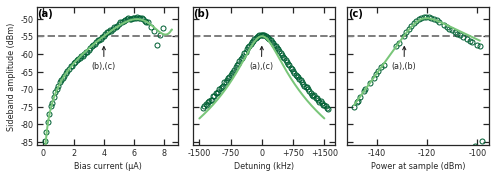

In [9]:
plt.style.use('../my_rcparams.mplstyle')

fig = plt.figure(figsize=cm2inch(17.2,6),constrained_layout=True)
gs = fig.add_gridspec(1, 3, wspace=0.05)

axa = fig.add_subplot(gs[0,0])
# plt.axhline(max(panel_b['ymeas']),c='grey',ls='dashed')
plt.axhline(-55,c='grey',ls='dashed')
plt.plot(panel_a['xmeas'],panel_a['ymeas'],'o',markerfacecolor='none',c=cmap(0.1))
plt.plot(panel_a['xtheo2'],panel_a['ytheo2'],c=cmap(0.5))
plt.xlabel(panel_a['xlabel'])
plt.ylabel('Sideband amplitude (dBm)')
plt.gca().set_ylim(bottom=-86)
alims = plt.gca().get_ylim()
plt.annotate("(b),(c)", xy=(4, -57), xytext=(3.2, -57-7),arrowprops=dict(arrowstyle="->",color='k'))
# plt.xlim(3.8,4.2)
# plt.ylim(-60,-50)

axb = fig.add_subplot(gs[0,1])
# plt.axhline(max(panel_b['ymeas']),c='grey',ls='dashed')
plt.axhline(-55,c='grey',ls='dashed')
maxm = np.argmax(panel_b['ymeas'].values)
maxt = np.argmax(panel_b['ytheo'])
plt.plot(panel_b['xmeas']-panel_b['xmeas'][maxm],panel_b['ymeas'],'o',markerfacecolor='none',c=cmap(0.1))
plt.plot(panel_b['xtheo']-panel_b['xtheo'][maxt],panel_b['ytheo'],c=cmap(0.5))
plt.xlabel(panel_b['xlabel'])
# plt.ylabel('Sideband amplitude (dBm)')
plt.gca().set_yticklabels([])
plt.xticks([-1500,-750,0,750,1500])
plt.gca().xaxis.set_major_formatter(formatter)
plt.annotate("(a),(c)", xy=(0, -57), xytext=(-300, -57-7),arrowprops=dict(arrowstyle="->",color='k'))
plt.ylim(alims)
# plt.xlim(-100,100)
# plt.ylim(-60,-50)

axc = fig.add_subplot(gs[0,2])
# plt.axhline(max(panel_b['ymeas']),c='grey',ls='dashed')
plt.axhline(-55,c='grey',ls='dashed')
plt.plot(panel_c['xmeas'],panel_c['ymeas'],'o',markerfacecolor='none',c=cmap(0.1))
plt.plot(panel_c['xtheo'],panel_c['ytheo'],c=cmap(0.5))
plt.xlabel(panel_c['xlabel'])
# plt.ylabel('Sideband amplitude (dBm)')
plt.gca().set_yticklabels([])
plt.gca().set_ylim(bottom=-83)
plt.annotate("(a),(b)", xy=(-129, -57), xytext=(-134, -57-7),arrowprops=dict(arrowstyle="->",color='k'))
plt.ylim(alims)
    
axa.text(0.06,0.95, '(a)', fontsize=figtextsize, color='black', weight='bold',transform=axa.transAxes, verticalalignment = 'center', horizontalalignment = 'center')
axb.text(0.06,0.95, '(b)', fontsize=figtextsize, color='black', weight='bold', transform=axb.transAxes, verticalalignment = 'center', horizontalalignment = 'center')
axc.text(0.06,0.95, '(c)', fontsize=figtextsize, color='black', weight='bold', transform=axc.transAxes, verticalalignment = 'center', horizontalalignment = 'center')
# 0.07,0.93

plt.savefig('Figure3.pdf',bbox_inches='tight',dpi=dpi)
plt.show()
plt.close()